In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,24,2010-12-01 08:45:00,3.75,12583,France
27,24,2010-12-01 08:45:00,3.75,12583,France
28,12,2010-12-01 08:45:00,3.75,12583,France
29,12,2010-12-01 08:45:00,0.85,12583,France
30,24,2010-12-01 08:45:00,0.65,12583,France


In [4]:
df = df.drop('Description', axis = 1)

In [6]:
df = df.drop(['InvoiceNo','StockCode'], axis = 1)

In [8]:
countries = ['Germany','France']
df = df[df.Country.isin(countries)]
df.shape 

(18052, 5)

In [10]:
non_cat = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']
non_cat.remove('InvoiceDate')
cat.append('InvoiceDate')

In [12]:
cat

['CustomerID', 'Country', 'InvoiceDate']

In [14]:
def treat_missing_numeric(df,columns,how = 'mean'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mean', 'mode', 'median','ffill', numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mean':
        for i in columns:
            print("Filling missing values with mean for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mean())
            
    elif how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode())
    
    elif how == 'median':
        for i in columns:
            print("Filling missing values with median for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].median())
    
    elif how == 'ffill':
        for i in columns:
            print("Filling missing values with forward fill for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(method ='ffill')
    
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    else:
        print("Missing value fill cannot be completed")
    return df

In [17]:
def treat_missing_categorical(df,columns,how = 'mode'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mode', any string or numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode()[0])
    elif type(how) == str:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(str(how))
    else:
        print("Missing value fill cannot be completed")
    return df

In [15]:
treat_missing_numeric(df,non_cat,how = 'mean')

Filling missing values with mean for columns - Quantity
Filling missing values with mean for columns - UnitPrice


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,24,2010-12-01 08:45:00,3.75,12583,France
27,24,2010-12-01 08:45:00,3.75,12583,France
28,12,2010-12-01 08:45:00,3.75,12583,France
29,12,2010-12-01 08:45:00,0.85,12583,France
30,24,2010-12-01 08:45:00,0.65,12583,France
31,48,2010-12-01 08:45:00,0.85,12583,France
32,24,2010-12-01 08:45:00,1.25,12583,France
33,18,2010-12-01 08:45:00,2.95,12583,France
34,24,2010-12-01 08:45:00,2.95,12583,France
35,24,2010-12-01 08:45:00,1.95,12583,France


In [18]:
treat_missing_categorical(df,cat,how = 'mode')

Filling missing values with mode for columns - CustomerID
Filling missing values with mode for columns - Country
Filling missing values with mode for columns - InvoiceDate


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,24,2010-12-01 08:45:00,3.75,12583,France
27,24,2010-12-01 08:45:00,3.75,12583,France
28,12,2010-12-01 08:45:00,3.75,12583,France
29,12,2010-12-01 08:45:00,0.85,12583,France
30,24,2010-12-01 08:45:00,0.65,12583,France
31,48,2010-12-01 08:45:00,0.85,12583,France
32,24,2010-12-01 08:45:00,1.25,12583,France
33,18,2010-12-01 08:45:00,2.95,12583,France
34,24,2010-12-01 08:45:00,2.95,12583,France
35,24,2010-12-01 08:45:00,1.95,12583,France


In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

for col in cat:
    df[col]=labelEnc.fit_transform(df[col])
    

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,24,0,3.75,67,0
27,24,0,3.75,67,0
28,12,0,3.75,67,0
29,12,0,0.85,67,0
30,24,0,0.65,67,0


In [20]:
df = df.drop('InvoiceDate', axis = 1)

In [21]:
df.head()

,Quantity,UnitPrice,CustomerID,Country
26,24,3.75,67,0
27,24,3.75,67,0
28,12,3.75,67,0
29,12,0.85,67,0
30,24,0.65,67,0


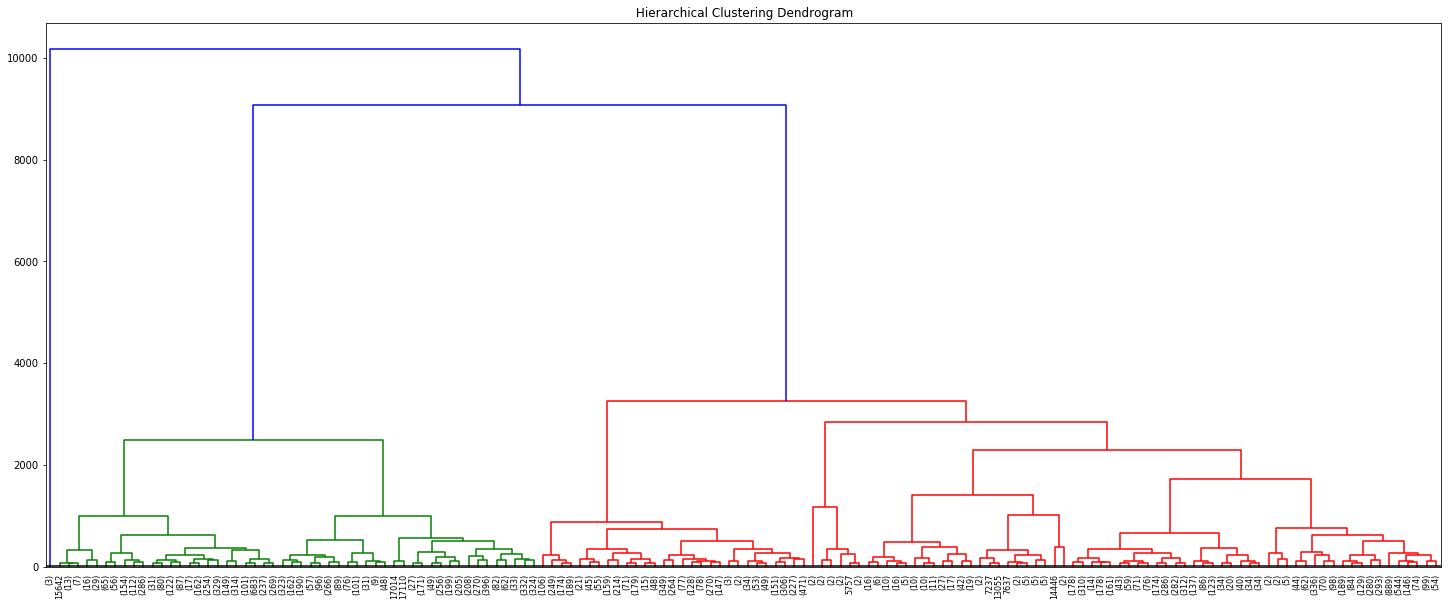

In [24]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title(' Hierarchical Clustering Dendrogram')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [25]:
features = df.iloc[:, 0:-1].values

In [26]:
from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters=5)
clusters = km.fit(features)

In [29]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

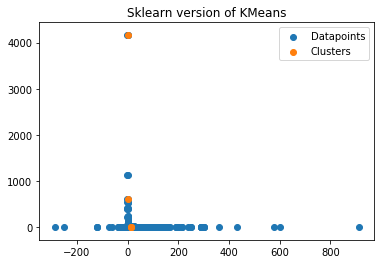

In [28]:
plt.scatter(features[:, 0], features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [38]:
from sklearn import cluster, mixture # For clustering 

In [39]:
data= df.iloc[:,0:]

In [40]:
def Dbscan(x, y):
    db=cluster.DBSCAN(eps=x)
    db_result=db.fit_predict(y)
    return(db_result)

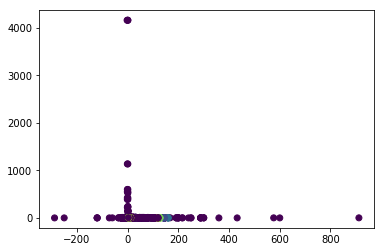

In [41]:
db_result = Dbscan(0.3,data)
data['Dbscan'] = pd.DataFrame(db_result)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],  c=db_result)
plt.show() 